# CCTV Cameras by City and Country

The article ['The world's most-surveilled cities - Comparitech'](https://www.comparitech.com/vpn-privacy/the-worlds-most-surveilled-cities/) states that there is a very low correlation between number of security camera in major cities and crime rate. Let's use the data set given in the article to reproduce the result for the cities in the list below. The data can be download from this [Google Docs spreadsheet](https://docs.google.com/spreadsheets/d/1bKBFiVXNzrgtW95j66Tpcj2OYmL-Gj-mKxvVvEN8aI8/htmlview#gid=979494433).

 - [Preparing the data](#Preparing-the-data)
 - [Looking for correlations](#Looking-for-correlations)
 - [Linear regression](#Linear-regression)

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
ROOT_DIR = '/Users/angelo/Programming/data/CCTVs'
cctv_per_city_file_name = os.path.join(ROOT_DIR, 'cctv-per-city.csv')
cctv_per_city_df = pd.read_csv(cctv_per_city_file_name, usecols=list(range(0, 5)) + list(range(7, 9)), thousands=',')

In [4]:
new_cols = [col.strip().replace('#', 'num').replace(' ', '_').replace(',', '').lower() for col in cctv_per_city_df.columns]
cctv_per_city_df.columns = new_cols

In [5]:
cctv_per_city_df.head(10)

,city,country,num_of_cctv_cameras,num_of_people,num_of_cctv_cameras_per_1000_people,crime_index,safety_index
0,Chongqing,China,2579890.0,15354067,168.03,33.18,66.82
1,Shenzhen,China,1929600.0,12128721,159.09,42.91,57.09
2,Shanghai,China,2985984.0,26317104,113.46,40.87,59.13
3,Tianjin,China,1244160.0,13396402,92.87,29.15,70.85
4,Ji'nan,China,540463.0,7321200,73.82,15.93,84.07
5,London,England (UK),627707.0,9176530,68.40,52.24,47.76
6,Wuhan,China,500000.0,8266273,60.49,21.18,78.82
7,Guangzhou,China,684000.0,12967862,52.75,47.43,52.57
8,Beijing,China,800000.0,20035455,39.93,42.31,57.69
9,Atlanta,United States,7800.0,501178,15.56,62.86,37.14


In [6]:
cctv_per_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
city                                   120 non-null object
country                                120 non-null object
num_of_cctv_cameras                    117 non-null float64
num_of_people                          120 non-null int64
num_of_cctv_cameras_per_1000_people    119 non-null float64
crime_index                            120 non-null float64
safety_index                           120 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.7+ KB


In [7]:
cctv_per_city_df.describe().applymap('{:.2f}'.format)

,num_of_cctv_cameras,num_of_people,num_of_cctv_cameras_per_1000_people,crime_index,safety_index
count,117.00,120.00,119.00,120.00,120.00
mean,115480.84,6450933.74,9.55,44.95,55.05
std,429959.54,6487371.75,26.82,16.73,16.73
min,40.00,128793.00,0.00,8.09,19.60
25%,1200.00,1568572.00,0.40,32.89,42.76
50%,4000.00,4146242.50,1.07,43.14,56.86
75%,24500.00,9746047.75,5.31,57.24,67.11
max,2985984.00,37435191.00,168.03,80.40,91.91


Let's do some grouping to get a better sense of the data.

In [8]:
cctv_per_city_df.groupby('country')[['num_of_cctv_cameras']].sum().sort_values(by='num_of_cctv_cameras', ascending=False)[:10].reset_index()

,country,num_of_cctv_cameras
0,China,11407891.0
1,England (UK),627707.0
2,India,274784.0
3,Russia,176000.0
4,Iraq,120000.0
5,Turkey,107000.0
6,Singapore,86000.0
7,United States,69038.0
8,Australia,62565.0
9,UAE,55000.0


China is the country that has the most surveillance cameras per 1,000 people in the world, followed by England. Let's check to see if there are more data on the other countries of the United Kingdom.

In [9]:
countries_in_UK = {country: 'United Kingdom' for country in  ['England (UK)', 'Wales (UK)', 'Nothern Ireland (UK)', 'Scotland (UK)']}

In [10]:
cctv_per_city_df.loc[cctv_per_city_df['country'].isin(list(countries_in_UK.keys()))]

,city,country,num_of_cctv_cameras,num_of_people,num_of_cctv_cameras_per_1000_people,crime_index,safety_index
5,London,England (UK),627707.0,9176530,68.40,52.24,47.76
47,Cardiff,Wales (UK),1022.0,474187,2.16,35.50,64.50
87,Edinburgh,Scotland (UK),226.0,530741,0.43,30.43,69.57


In [11]:
cctv_per_city_df.replace(to_replace=countries_in_UK, inplace=True)

In [12]:
cctv_per_city_df.groupby('country')[['num_of_cctv_cameras']].sum().sort_values(by='num_of_cctv_cameras', ascending=False)[:10].reset_index()

,country,num_of_cctv_cameras
0,China,11407891.0
1,United Kingdom,628955.0
2,India,274784.0
3,Russia,176000.0
4,Iraq,120000.0
5,Turkey,107000.0
6,Singapore,86000.0
7,United States,69038.0
8,Australia,62565.0
9,UAE,55000.0


Ok, there is an increase in the number of CCTV cameras in the United Kingdom as a whole, since we can also include data for Wales and Scotland.

Let's now calculate an average of the number of CCTV cameras weighted on the city populations. We will first need to define a `weighted_average` function that we then can feed into the `groupby` function.

In [13]:
def weighted_average(group, column, weight):
    g = group[column]
    w = group[weight]
    try:
        return (g * w).sum()/w.sum()
    except ZeroDivisionError:
        return g.mean()

In [14]:
average_cctv_per_city_df = cctv_per_city_df.groupby('country').apply(weighted_average, "num_of_cctv_cameras_per_1000_people", "num_of_people")

In [15]:
average_cctv_per_city_df = average_cctv_per_city_df.sort_values(ascending=False)[:10].reset_index().rename(columns={0: 'num_of_cctv_cameras_per_1000_people'})

In [16]:
average_cctv_per_city_df.head(10)

,country,num_of_cctv_cameras_per_1000_people
0,China,85.987486
1,United Kingdom,61.771812
2,Singapore,15.250000
3,UAE,12.685970
4,Iraq,12.300000
5,Germany,11.180000
6,Russia,9.829694
7,Poland,7.850000
8,Austria,7.380000
9,Turkey,7.150000


The United Kingdom is second behind China in the weighted average number of CCTV cameras per 1,000 people. Let's see what are the most surveilled cities in the world.

In [17]:
cctv_per_city_df[['city', 'num_of_cctv_cameras_per_1000_people', 'country']].sort_values(by='num_of_cctv_cameras_per_1000_people', ascending=False)[:10]

,city,num_of_cctv_cameras_per_1000_people,country
0,Chongqing,168.03,China
1,Shenzhen,159.09,China
2,Shanghai,113.46,China
3,Tianjin,92.87,China
4,Ji'nan,73.82,China
5,London,68.40,United Kingdom
6,Wuhan,60.49,China
7,Guangzhou,52.75,China
8,Beijing,39.93,China
9,Atlanta,15.56,United States


Of the top 10 most-surveilled cities in the world, 8 are in China!

Since we're at it, let's list all of the cities in China in this data set.

In [18]:
cctv_per_city_df.loc[cctv_per_city_df['country'] == 'China'].reset_index()

,index,city,country,num_of_cctv_cameras,num_of_people,num_of_cctv_cameras_per_1000_people,crime_index,safety_index
0,0,Chongqing,China,2579890.0,15354067,168.03,33.18,66.82
1,1,Shenzhen,China,1929600.0,12128721,159.09,42.91,57.09
2,2,Shanghai,China,2985984.0,26317104,113.46,40.87,59.13
3,3,Tianjin,China,1244160.0,13396402,92.87,29.15,70.85
4,4,Ji'nan,China,540463.0,7321200,73.82,15.93,84.07
5,6,Wuhan,China,500000.0,8266273,60.49,21.18,78.82
6,7,Guangzhou,China,684000.0,12967862,52.75,47.43,52.57
7,8,Beijing,China,800000.0,20035455,39.93,42.31,57.69
8,13,Urumqi,China,43394.0,3500000,12.40,36.76,63.24
9,20,Nanchang,China,50400.0,5463538,9.22,8.09,91.91


Let's see how many cities are present in the data set grouped by country.

In [19]:
cctv_per_city_df.groupby('country')[['city']].count().sort_values(by='city', ascending=False)[:15].reset_index()

,country,city
0,United States,13
1,China,11
2,Brazil,10
3,India,9
4,United Kingdom,3
5,Australia,3
6,Pakistan,3
7,Vietnam,2
8,France,2
9,Mexico,2


## Looking for correlations

In [20]:
cctv_per_city_df.corr()

,num_of_cctv_cameras,num_of_people,num_of_cctv_cameras_per_1000_people,crime_index,safety_index
num_of_cctv_cameras,1.000000,0.381571,0.933100,-0.115621,0.115618
num_of_people,0.381571,1.000000,0.298218,0.110286,-0.110297
num_of_cctv_cameras_per_1000_people,0.933100,0.298218,1.000000,-0.168128,0.168126
crime_index,-0.115621,0.110286,-0.168128,1.000000,-1.000000
safety_index,0.115618,-0.110297,0.168126,-1.000000,1.000000


There is only a -0.168 correlation between number of CCTV cameras per one thousand people and the crime index. Let's check that out with a plot that shows number of CCTV cameras and crime rate. One would expect that overall the crime rate would go down with an increase in number of cameras.

## Linear regression

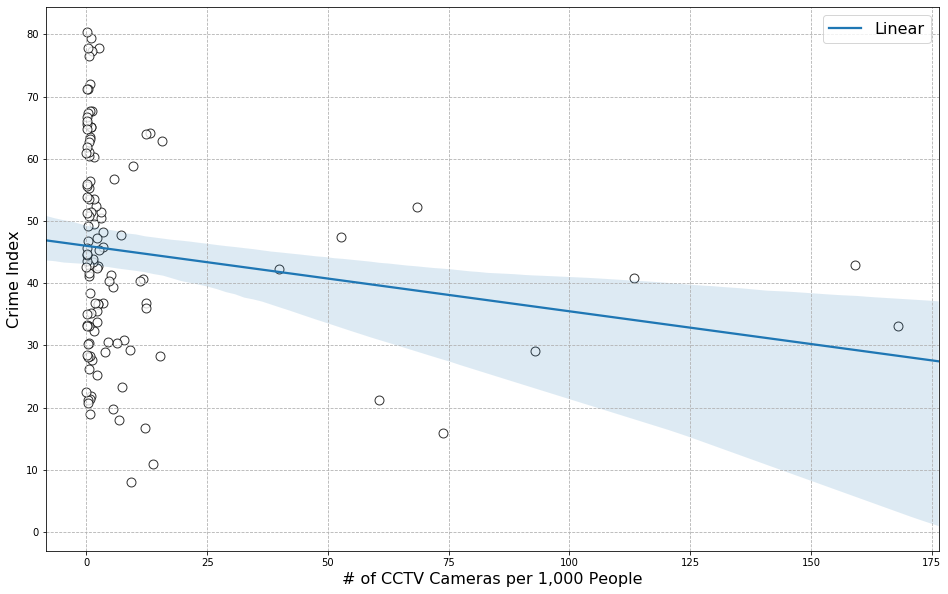

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.scatter(cctv_per_city_df['num_of_cctv_cameras_per_1000_people'], cctv_per_city_df['crime_index'], s=80, facecolor='white', edgecolor='k', alpha=0.8)
sns.regplot(data=cctv_per_city_df, x='num_of_cctv_cameras_per_1000_people', y='crime_index', order=1, label='Linear', ci=95, \
            scatter_kws={'facecolor': 'w', 'edgecolor': 'k'}, ax=ax, scatter=False)
ax.grid(True, linestyle='--')
ax.set_xlabel('# of CCTV Cameras per 1,000 People', fontsize=16)
ax.set_ylabel('Crime Index', fontsize=16)
ax.legend(loc='best', fontsize=16);

Let's confront the problem of `NA` values using scikit-learn's _SimpleImputer_ class with its _median_ strategy and _StandardScaler_ to scale to attributes between `0` and `1`.

In [22]:
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# cat_attribs = list(cctv_per_city_df.select_dtypes('object').columns)
# num_attribs = list(set(list(cctv_per_city_df.select_dtypes(['float64', 'int64']).columns)) - \
#                    set(['num_of_cctv_cameras', 'num_of_people', 'crime_index', 'safety_index']))
# print(num_attribs)
# print(cat_attribs)
# cat_pipeline = OneHotEncoder()
# num_pipeline = Pipeline([('std_scaler', StandardScaler()), ('inputer', SimpleImputer(strategy='median'))])
# full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', cat_pipeline, cat_attribs)])
# full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs)])

In [24]:
X = cctv_per_city_df['num_of_cctv_cameras_per_1000_people']#.drop(['crime_index', 'safety_index'], axis=1)
med = np.median(X[~np.isnan(X)])
X.fillna(med, inplace=True)
X_b = X.values.reshape(-1, 1)
y = cctv_per_city_df['crime_index'].values
# X_tr = full_pipeline.fit_transform(X)

In [25]:
reg = LinearRegression()
reg.fit(X_b, y)
print(f'R-squared of the linear regression: {reg.score(X_b, y):.5f}')

R-squared of the linear regression: 0.02784


In [26]:
y_pred = reg.predict(X_b)
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_pred, y)):.5f}')

Root mean squared error: 16.42869
